## Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Import the data 

In [7]:
cab = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer = pd.read_csv("Customer_ID.csv")
transaction = pd.read_csv("Transaction_ID.csv")

In [3]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### Check for data types and any null values 

In [9]:
cab.info()    # Change the data type of the Date of travel to Date format 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [22]:
cab['Date of Travel'] = pd.to_datetime(cab['Date of Travel']).dt.normalize()  

# normalize() the time component, which will keep the dtype as datetime64 but it will only display the date

In [23]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [24]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1970-01-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1970-01-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1970-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1970-01-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1970-01-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [10]:
cab.isnull().sum()   # No null values 

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [11]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [12]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [14]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [16]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [17]:
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

## RENAME THE COLUMNS IN THE TABLES 

- Renaming the columns will make the tables easier to work with. Spaces will throw errors. In this case, I will replace the spaces with the underscores(_)

In [47]:
cab.columns = cab.columns.str.replace(' ', '_')

In [48]:
customer.columns = customer.columns.str.replace(' ', '_')

In [49]:
city.columns = city.columns.str.replace(' ', '_')

In [50]:
transaction.columns = transaction.columns.str.replace(' ', '_')

#### TODO - EXTRACT THE DAY, MONTH, YEAR AND WEEKDAY AND PUT THOSE INTO SEPARATE COLUMNS

## EXPLORATORY DATA ANALYSIS 

### 1. Transaction Analysis 
- Question 1: Which company records more transactions?

In [65]:
year = cab['Date_of_Travel'].dt.year
month = cab['Date_of_Travel'].dt.month
day = cab['Date_of_Travel'].dt.day
weekday =cab['Date_of_Travel'].dt.weekday

cab['Year'] = year
cab['Month'] = month
cab['Day'] = day
cab['weekday'] = weekday


In [63]:
cab.head()   # There are two month, day and year columns. Drop the duplicated columns 

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,month,day,year,Year,Month,Day,weekday
0,10000011,1970-01-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,1,1970,1970,1,1,3
1,10000012,1970-01-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,1,1970,1970,1,1,3
2,10000013,1970-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,1,1970,1970,1,1,3
3,10000014,1970-01-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,1,1970,1970,1,1,3
4,10000015,1970-01-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,1,1970,1970,1,1,3


In [78]:
cab = cab.drop(['month', 'day', 'year'], axis=1)

In [69]:
plot1 = cab.groupby(['Company']).Transaction_ID.count()

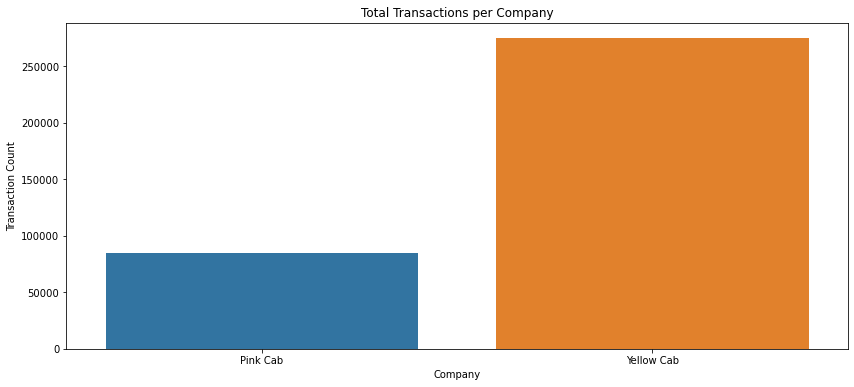

In [80]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title("Total Transactions per Company")
plt.ylabel('Transaction Count')
plt.show()

- From the above analysis, the yellow cab has more transactions taking place. Almost three times those of the pink cab 

In [75]:
cab.describe(include='all')

<ipython-input-75-f7acbe4b6807>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cab.describe(include='all')


,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,month,day,year,Year,Month,Day,weekday
count,3.593920e+05,359392,359392,359392,359392.000000,359392.000000,359392.000000,359392.0,359392.0,359392.0,359392.0,359392.0,359392.0,359392.0
unique,NaN,1,2,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1970-01-01 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,359392,274681,99885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.022076e+07,NaN,NaN,NaN,22.567254,423.443311,286.190113,1.0,1.0,1970.0,1970.0,1.0,1.0,3.0
std,1.268058e+05,NaN,NaN,NaN,12.233526,274.378911,157.993661,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000001e+07,NaN,NaN,NaN,1.900000,15.600000,19.000000,1.0,1.0,1970.0,1970.0,1.0,1.0,3.0
25%,1.011081e+07,NaN,NaN,NaN,12.000000,206.437500,151.200000,1.0,1.0,1970.0,1970.0,1.0,1.0,3.0


### From the Summary above, it appears that the Date_of_Travel column only covers one month. To clarify

- To conduct further analysis, i will need to join the tables 
- Merge the cab data and the transaction data on he common column

In [79]:
merge1 = cab.merge(transaction, how='left', on='Transaction_ID')
merge1.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Day,weekday,Customer_ID,Payment_Mode
0,10000011,1970-01-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1970,1,1,3,29290,Card
1,10000012,1970-01-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1970,1,1,3,27703,Card
2,10000013,1970-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1970,1,1,3,28712,Cash
3,10000014,1970-01-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1970,1,1,3,28020,Cash
4,10000015,1970-01-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1970,1,1,3,27182,Card


- Merge it again with the customer data 

In [81]:
customer.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')

In [83]:
merge2 = merge1.merge(customer, how='left', on='Customer_ID')
merge2.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Day,weekday,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,1970-01-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1970,1,1,3,29290,Card,Male,28,10813
1,10000012,1970-01-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1970,1,1,3,27703,Card,Male,27,9237
2,10000013,1970-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1970,1,1,3,28712,Cash,Male,53,11242
3,10000014,1970-01-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1970,1,1,3,28020,Cash,Male,23,23327
4,10000015,1970-01-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1970,1,1,3,27182,Card,Male,33,8536


In [84]:
master_df = merge2
master_df.isnull().sum()   # recheck the nulls 

Transaction_ID        0
Date_of_Travel        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Year                  0
Month                 0
Day                   0
weekday               0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income_(USD/Month)    0
dtype: int64

In [85]:
master_df.duplicated().sum()   # No duplicated values 

0

### Analysis of the trips/transactions per city
- Which city uses CAB services the most? 

In [86]:
cities = master_df['City'].value_counts()
cities = dict(cities)
cities

{'NEW YORK NY': 99885,
 'CHICAGO IL': 56625,
 'LOS ANGELES CA': 48033,
 'WASHINGTON DC': 43737,
 'BOSTON MA': 29692,
 'SAN DIEGO CA': 20488,
 'SILICON VALLEY': 8519,
 'SEATTLE WA': 7997,
 'ATLANTA GA': 7557,
 'DALLAS TX': 7017,
 'MIAMI FL': 6454,
 'AUSTIN TX': 4896,
 'ORANGE COUNTY': 3982,
 'DENVER CO': 3825,
 'NASHVILLE TN': 3010,
 'SACRAMENTO CA': 2367,
 'PHOENIX AZ': 2064,
 'TUCSON AZ': 1931,
 'PITTSBURGH PA': 1313}

In [90]:
city_name = [key for (key, value) in cities.items()]
values = [value for (key, value) in cities.items()]

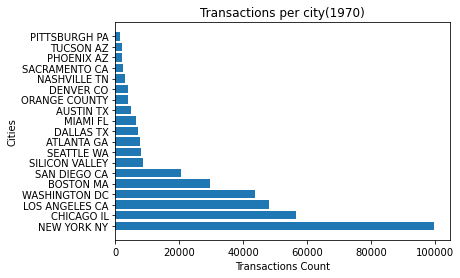

In [92]:
plt.barh(city_name,values)
plt.title('Transactions per city(1970)')
plt.xlabel('Transactions Count')
plt.ylabel('Cities')
plt.show()

- From the above analysis, it is evident that New York uses cab services the most 

## Preferred Payment Method

- What payment method do the customers prefer? 

In [93]:
payment = master_df['Payment_Mode'].value_counts()
payment

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

Text(0.5, 1.0, 'Overall Payment Method Preference')

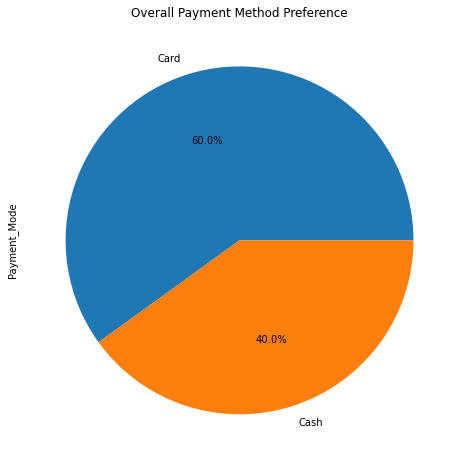

In [95]:
plt.figure(figsize=(15,8))
payment.plot.pie(autopct="%.1f%%")
plt.title('Overall Payment Method Preference')

- From the above analysis,60% of the customers prefer paying by card 

## Analysis based on gender 
- Question 4: Between the male and female customers, who tend to use the cab service  more? 

In [97]:
genders = master_df['Gender'].value_counts()
genders

Male      205912
Female    153480
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Customer-Gender Distribution')

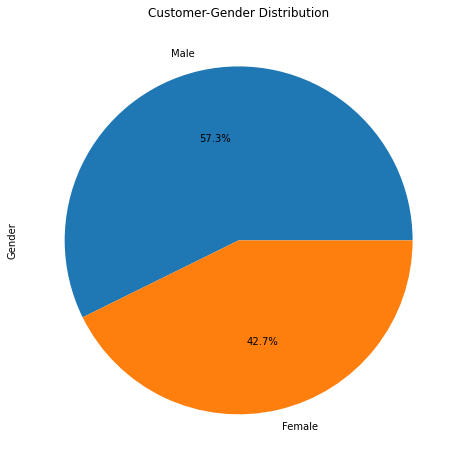

In [98]:
plt.figure(figsize=(15,8))
genders.plot.pie(autopct="%.1f%%")
plt.title('Customer-Gender Distribution')

- From the above analysis, 57.3% of the customers are male while 42.7% are female

### What cab service does each Gender prefer? 

In [99]:
master_df.groupby(['Company','Payment_Mode']).Transaction_ID.count()

Company     Payment_Mode
Pink Cab    Card             50719
            Cash             33992
Yellow Cab  Card            164785
            Cash            109896
Name: Transaction_ID, dtype: int64

In [101]:
master_df.groupby(['Company','Payment_Mode']).Price_Charged.mean()
# From this analysis, the amount paid through the pink and yellow cab are almost the same for both cab services. 

Company     Payment_Mode
Pink Cab    Card            311.197319
            Cash            310.209299
Yellow Cab  Card            457.924979
            Cash            458.567368
Name: Price_Charged, dtype: float64

Text(0, 0.5, 'Customer Number')

<Figure size 1440x720 with 0 Axes>

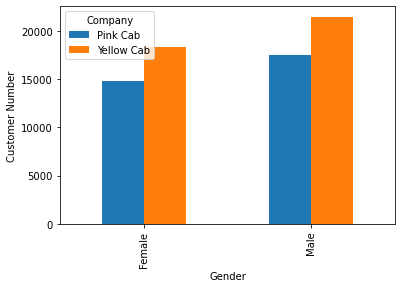

In [103]:
gen=master_df.groupby(["Gender","Company"]).Customer_ID.nunique()
plt.figure(figsize=(20,10))
gen.unstack().plot(kind="bar")
plt.ylabel("Customer Number")

Text(0.5, 1.0, 'Customers per City')

<Figure size 432x288 with 0 Axes>

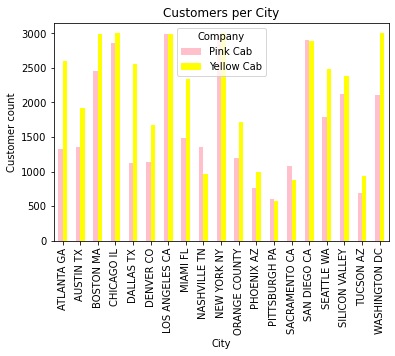

In [104]:
city_plot = master_df.groupby(["City","Company"]).Customer_ID.nunique()
plt.figure()
city_plot.unstack().plot(kind="bar", color=["Pink","Yellow"])
plt.ylabel("Customer count")
plt.title("Customers per City")

- The above analysis shows the customers per city for each cab service 

## Age Bracket analysis 

- What age of people use the cab service more?

In [107]:
age = master_df.groupby(["Age"]).Customer_ID.nunique()

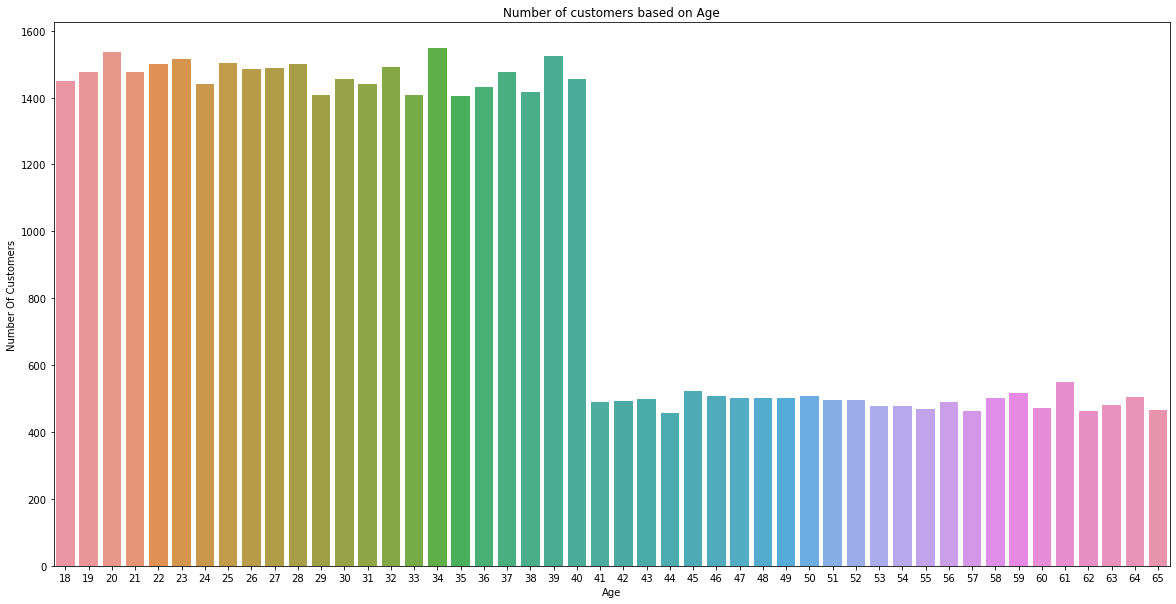

In [108]:
plt.figure(figsize=(20,10))
sns.barplot(x=age.index,y=age.values)
plt.title("Number of customers based on Age")
plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.show()

- From the above analysis, a majority of the customers are 40 and below